In [1]:
import pandas as pd
from IPython.display import Image
from sklearn import tree, cross_validation
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [2]:
credit_data = pd.read_csv('german_credit.csv')

In [3]:
credit_data[:5]

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
target = credit_data[credit_data.columns[0]]
train = credit_data[credit_data.columns[1:]]

In [5]:
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
import pydotplus 

In [7]:
dot_data = tree.export_graphviz(model, out_file="tree.out", feature_names=train.columns,
                         filled=True, rounded=True,  
                         special_characters=True)  

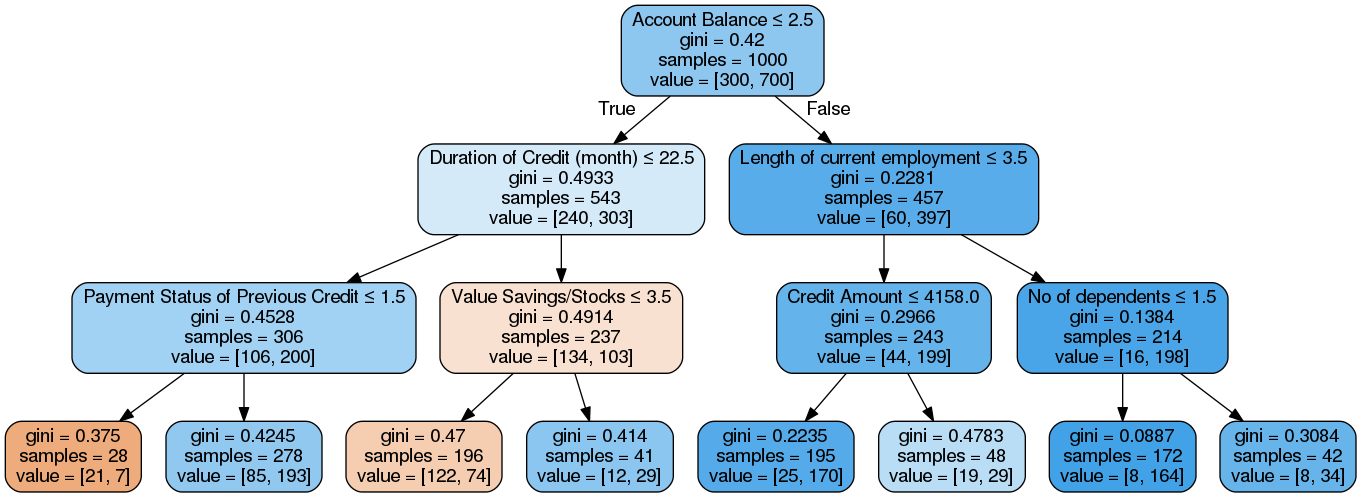

In [8]:
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())  

Кредитоспособность зависит от размера счета. Чем больше счет, тем больше вероятность, что человек вернут кредит. На втором уровне учитывается срок, на который человек берет кредит, и время, которое он работает на текущей работе. Вероятность отдать кредит тем больше, чем меньше срок кредита и чем реже человек меняет работу.

In [9]:
tree_depth = np.linspace(1, 100, 101)
train_acc = []
cross_acc = []
for depth in tree_depth:
    model = tree.DecisionTreeClassifier(max_depth = depth)
    model.fit(train, target)
    test_predictions = model.predict(train)
    train_acc.append(accuracy_score(target, test_predictions))
    cross_acc.append(np.mean(cross_validation.cross_val_score(model, train, target)))

In [10]:
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


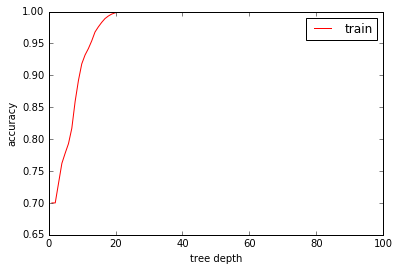

In [11]:
plt.plot(tree_depth, train_acc, 'r', label = "train")
plt.xlabel("tree depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

Деревья с большой глубиной переобучаются

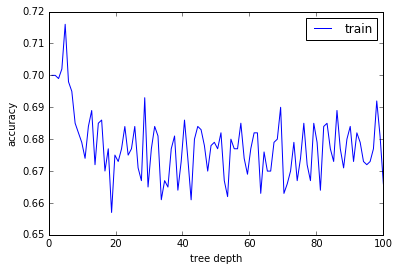

In [12]:
plt.plot(tree_depth, cross_acc, 'b', label = "train")
plt.xlabel("tree depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [13]:
print("Лучшая точность при глубине дерева", np.argmax(cross_acc[:10]))

Лучшая точность при глубине дерева 4
